# <span style='color:brown'> Assignment 2 <span>


## EDA_And_Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

## Loading the dataset


In [2]:
df = pd.read_csv(r"H:\Entri D44\MACHINE LEARNING\Data Set\Employee.csv")

## <span style='color:green'> Data Exploration <span>

## <span style='color:Blue'> Understanting Data <span>

In [3]:
df.sample(10)

,Company,Age,Salary,Place,Country,Gender
86,Infosys,41.0,3000.0,Delhi,India,0
117,CTS,44.0,9876.0,NaN,India,1
119,CTS,33.0,1089.0,Noida,India,0
94,TCS,22.0,4824.0,Calcutta,India,0
135,CTS,40.0,9284.0,Calcutta,India,1
78,TCS,NaN,6000.0,Calcutta,India,0
80,TCS,32.0,8000.0,Nagpur,India,0
60,TCS,NaN,7084.0,Calcutta,India,0
89,TCS,36.0,5000.0,Chennai,India,0
49,CTS,19.0,1234.0,Cochin,India,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Company  140 non-null    object 
 1   Age      130 non-null    float64
 2   Salary   124 non-null    float64
 3   Place    134 non-null    object 
 4   Country  148 non-null    object 
 5   Gender   148 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 7.1+ KB


In [5]:
df.value_counts()

Company                    Age   Salary  Place     Country  Gender
Infosys                    22.0  8787.0  Calcutta  India    1         2
TCS                        21.0  4824.0  Mumbai    India    0         2
CTS                        0.0   1234.0  Calcutta  India    0         1
                           18.0  1234.0  Mumbai    India    0         1
                           19.0  1234.0  Cochin    India    0         1
                                                                     ..
TCS                        36.0  5000.0  Chennai   India    0         1
                           37.0  2300.0  Mumbai    India    0         1
                                 3045.0  Calcutta  India    0         1
                           38.0  3045.0  Noida     India    0         1
Tata Consultancy Services  31.0  8345.0  Mumbai    India    0         1
Name: count, Length: 91, dtype: int64

In [6]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [7]:
df.describe()  # To get the descriptive statistics of the data

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [8]:
df.shape

(148, 6)

## Display unique values and their counts

### Method 1:

In [10]:
unique_values = {col: df[col].unique() for col in df.columns}
unique_lengths = {col: len(df[col].unique()) for col in df.columns}

In [11]:
unique_values 
unique_lengths

{'Company': 7, 'Age': 30, 'Salary': 41, 'Place': 12, 'Country': 1, 'Gender': 2}

### Method 2:

In [12]:
unique_vals = {col: df[col].unique() for col in df.columns}

In [13]:
unique_vals

{'Company': array(['TCS', 'Infosys', 'CTS', nan, 'Tata Consultancy Services',
        'Congnizant', 'Infosys Pvt Lmt'], dtype=object),
 'Age': array([20., 30., 35., 40., 23., nan, 34., 45., 18., 22., 32., 37., 50.,
        21., 46., 36., 26., 41., 24., 25., 43., 19., 38., 51., 31., 44.,
        33., 17.,  0., 54.]),
 'Salary': array([  nan, 2300., 3000., 4000., 5000., 6000., 7000., 8000., 9000.,
        1089., 1234., 3030., 3045., 3184., 4824., 5835., 7084., 8943.,
        8345., 9284., 9876., 2034., 7654., 2934., 4034., 5034., 8202.,
        9024., 4345., 6544., 6543., 3234., 4324., 5435., 5555., 8787.,
        3454., 5654., 5009., 5098., 3033.]),
 'Place': array(['Chennai', 'Mumbai', 'Calcutta', 'Delhi', 'Podicherry', 'Cochin',
        nan, 'Noida', 'Hyderabad', 'Bhopal', 'Nagpur', 'Pune'],
       dtype=object),
 'Country': array(['India'], dtype=object),
 'Gender': array([0, 1])}

In [14]:
unique_counts = df.nunique()  # This doesnt consider null values

In [15]:
unique_counts

Company     6
Age        29
Salary     40
Place      11
Country     1
Gender      2
dtype: int64

## Basic Stas and renaming of columns

In [16]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [17]:
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)

In [18]:
df

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
...,...,...,...,...,...,...
143,TCS,33.0,9024.0,Calcutta,India,1
144,Infosys,22.0,8787.0,Calcutta,India,1
145,Infosys,44.0,4034.0,Delhi,India,1
146,TCS,33.0,5034.0,Mumbai,India,1


## Data Cleaning

### Removing Duplicates

In [20]:
df = df.drop_duplicates()

In [21]:
df.shape    # 4 rows removed

(144, 6)

In [22]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,NaN,5000.0,Calcutta,India,0
6,TCS,NaN,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


## Replacing NaN in age column with 0

In [24]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0
5,Infosys,0.0,5000.0,Calcutta,India,0
6,TCS,0.0,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
9,CTS,45.0,9000.0,Delhi,India,0


In [25]:
df.isna().sum()

company     8
age         0
salary     23
place      14
country     0
gender      0
dtype: int64

### Filling Missing Values

In [29]:
df.isna().sum()

company    0
age        0
salary     0
place      0
country    0
gender     0
dtype: int64

### Finding Outliers using IQR

In [30]:
outliers = {}
for col in df.select_dtypes(include=np.number).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers[col] = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]

## 3. Data Analysis

### Filter: age > 40 and salary < 5000

In [31]:
filtered_df = df[(df['age'] > 40) & (df['salary'] < 5000)]
filtered_df.head(10)

,company,age,salary,place,country,gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


### Plot age vs salary

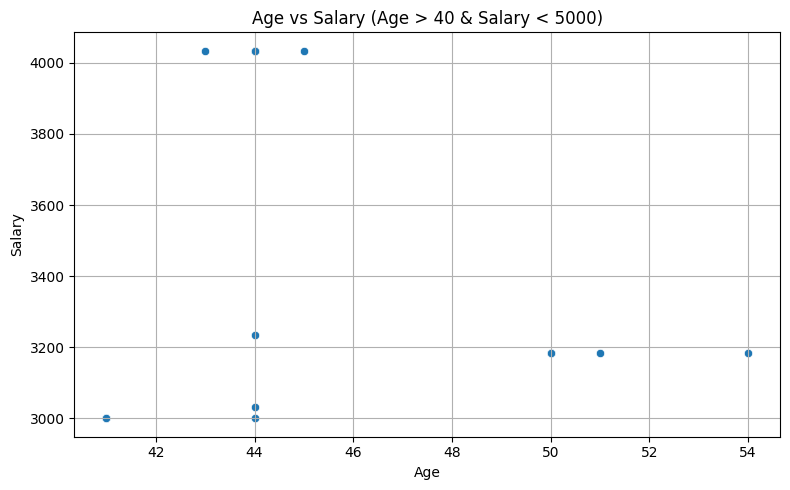

In [32]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=filtered_df, x='age', y='salary')
plt.title("Age vs Salary (Age > 40 & Salary < 5000)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

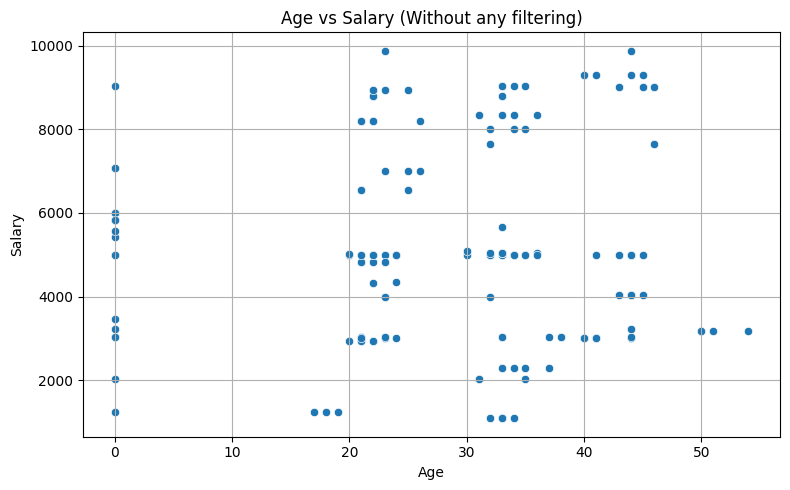

In [33]:
plt.figure(figsize=(8, 5))
sns.scatterplot(df, x='age', y='salary')
plt.title("Age vs Salary (Without any filtering)")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.grid(True)
plt.tight_layout()
plt.show()

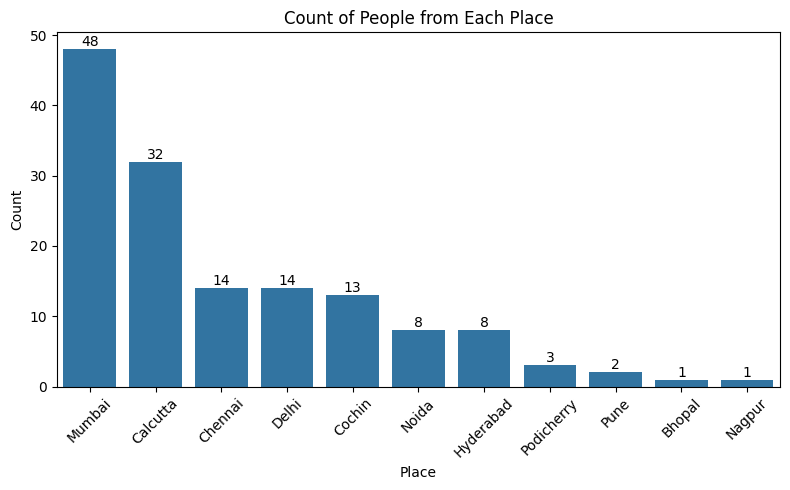

In [34]:
place_counts = df['place'].value_counts()
plt.figure(figsize=(8, 5))
pc=sns.barplot(x=place_counts.index, y=place_counts.values)
pc.bar_label(pc.containers[0])
plt.title("Count of People from Each Place")
plt.xlabel("Place")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 4. Data Encoding

### Label encoding the place column

In [36]:
df.head(10)

,company,age,salary,place,country,gender
0,TCS,20.0,5000.0,2,India,0
1,Infosys,30.0,5000.0,6,India,0
2,TCS,35.0,2300.0,1,India,0
3,Infosys,40.0,3000.0,4,India,0
4,TCS,23.0,4000.0,6,India,0
5,Infosys,0.0,5000.0,1,India,0
6,TCS,0.0,6000.0,2,India,1
7,Infosys,23.0,7000.0,6,India,1
8,TCS,34.0,8000.0,1,India,1
9,CTS,45.0,9000.0,4,India,0


### One Hot Encoding the gender column

In [37]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [38]:
encoder = OneHotEncoder()
encoded_gender = encoder.fit_transform(df[['gender']]).toarray()
encoded_gender_df = pd.DataFrame(encoded_gender, columns=encoder.get_feature_names_out(['gender']))
one_hot_encoded_df = pd.concat([df, encoded_gender_df], axis=1).drop('gender', axis=1)

one_hot_encoded_df.head(10)

,company,age,salary,place,country,gender_0,gender_1
0,TCS,20.0,5000.0,2.0,India,1.0,0.0
1,Infosys,30.0,5000.0,6.0,India,1.0,0.0
2,TCS,35.0,2300.0,1.0,India,1.0,0.0
3,Infosys,40.0,3000.0,4.0,India,1.0,0.0
4,TCS,23.0,4000.0,6.0,India,1.0,0.0
5,Infosys,0.0,5000.0,1.0,India,1.0,0.0
6,TCS,0.0,6000.0,2.0,India,0.0,1.0
7,Infosys,23.0,7000.0,6.0,India,0.0,1.0
8,TCS,34.0,8000.0,1.0,India,0.0,1.0
9,CTS,45.0,9000.0,4.0,India,1.0,0.0


In [39]:
encoded_cols = pd.get_dummies(df['gender'], prefix='gender').astype(int)
df = pd.concat([df, encoded_cols], axis=1)
df.drop('gender', axis=1, inplace=True)

In [40]:
df.head(10)

,company,age,salary,place,country,gender_0,gender_1
0,TCS,20.0,5000.0,2,India,1,0
1,Infosys,30.0,5000.0,6,India,1,0
2,TCS,35.0,2300.0,1,India,1,0
3,Infosys,40.0,3000.0,4,India,1,0
4,TCS,23.0,4000.0,6,India,1,0
5,Infosys,0.0,5000.0,1,India,1,0
6,TCS,0.0,6000.0,2,India,0,1
7,Infosys,23.0,7000.0,6,India,0,1
8,TCS,34.0,8000.0,1,India,0,1
9,CTS,45.0,9000.0,4,India,1,0


## 5. Feature Scaling

In [41]:
# Select only numeric columns for scaling
numeric_df = df.select_dtypes(include=np.number)

# StandardScaler
scaler_standard = StandardScaler()
scaled_std = pd.DataFrame(scaler_standard.fit_transform(numeric_df), columns=numeric_df.columns)

# MinMaxScaler
scaler_minmax = MinMaxScaler()
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(numeric_df), columns=numeric_df.columns)

print("\nScaled (StandardScaler):")
print(scaled_std.head())

print("\nScaled (MinMaxScaler):")
print(scaled_minmax.head())


Scaled (StandardScaler):
        age    salary     place  gender_0  gender_1
0 -0.483417 -0.100827 -0.893255  0.534522 -0.534522
1  0.214798 -0.100827  0.750562  0.534522 -0.534522
2  0.563906 -1.243735 -1.304209  0.534522 -0.534522
3  0.913014 -0.947426 -0.071346  0.534522 -0.534522
4 -0.273953 -0.524127  0.750562  0.534522 -0.534522

Scaled (MinMaxScaler):
        age    salary  place  gender_0  gender_1
0  0.370370  0.445089    0.2       1.0       0.0
1  0.555556  0.445089    0.6       1.0       0.0
2  0.648148  0.137817    0.1       1.0       0.0
3  0.740741  0.217480    0.4       1.0       0.0
4  0.425926  0.331285    0.6       1.0       0.0
